<a href="https://colab.research.google.com/github/Midun32/FDSFE_AAdesola/blob/main/HW5/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

---

###Data

The data used in this assignment contains a cleaned and curated version of the market real estate valuations collected from Sindian Dist., New Taipei City, Taiwan, by Prof. I-Cheng Yeh, Department of Civil Engineering, Tamkang University, Taiwan.

The features in the data are the following:

* ```transaction_date```: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* ```house_age```: the house age (unit: year)
* ```distance_nearest_MRT_station```: the distance to the nearest MRT station (unit: meter)
* ```convenience_stores```: the number of convenience stores in the living circle on foot (integer)

The target is:
* ```house_price_unit_area```house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

---

## HW instructions:

Similar to what was done in class, your task is to do the following:
1.   create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

2.   create a multiple regression model that utilizes all features in the dataset to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

--

In [3]:
# -- import libraries here
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

Read the data file from the class repo which can be found in the folder "data" and is called "Real_estate.csv"

In [4]:
# -- your code here
realEst = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/Real_estate.csv")
realEst

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5


## Task 1: simple linear regression

create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

---


Calculate the log10 of the ```distance_nearest_MRT_station``` column and add it as a new column to the data frame

In [5]:
# -- your code here
realEst["log_distance_nearest_MRT_station"] = np.log10(realEst["distance_nearest_MRT_station"])

In [7]:
realEst

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,log_distance_nearest_MRT_station
0,2012.917,32.0,84.87882,10,37.9,1.928799
1,2012.917,19.5,306.59470,9,42.2,2.486565
2,2013.583,13.3,561.98450,5,47.3,2.749724
3,2013.500,13.3,561.98450,5,54.8,2.749724
4,2012.833,5.0,390.56840,5,43.1,2.591697
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4,3.610875
410,2012.667,5.6,90.45606,9,50.0,1.956438
411,2013.250,18.8,390.96960,7,40.6,2.592143
412,2013.000,8.1,104.81010,5,52.5,2.020403


Standardize your feature and target data (setting their mean to 0 and standard deviation to 1)

In [10]:
# -- your code here
feature = realEst["log_distance_nearest_MRT_station"]
target = realEst["house_price_unit_area"]

In [11]:
feature_s = (feature-feature.mean())/feature.std()
target_s = (target-target.mean())/target.std()

Using the code library of your choice, fit a linear regression model to the data

In [13]:
x = sm.add_constant(feature_s)
y = target_s

In [35]:
t =target_s.values.reshape(-1,1)

In [37]:
slr_s = LinearRegression()

In [39]:
slr_s.fit(x, t)

LinearRegression()

In [14]:
# -- your code here
simpleModel = sm.OLS(endog = y, exog = x).fit()
print(simpleModel.summary())

                              OLS Regression Results                             
Dep. Variable:     house_price_unit_area   R-squared:                       0.539
Model:                               OLS   Adj. R-squared:                  0.538
Method:                    Least Squares   F-statistic:                     482.2
Date:                   Sun, 15 Oct 2023   Prob (F-statistic):           2.52e-71
Time:                           23:58:25   Log-Likelihood:                -426.53
No. Observations:                    414   AIC:                             857.1
Df Residuals:                        412   BIC:                             865.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Print both the $R^2$ and Adjusted-$R^2$ of this model

(+1 bonus point for using the `.format()` method in `print` to show the two values and round them to 3 decimal places)

In [17]:
# -- your code here
print('r2 = {0:1.3f}'.format(simpleModel.rsquared))
print('adjusted-r2 = {0:1.3f}'.format(simpleModel.rsquared_adj))

r2 = 0.539
adjusted-r2 = 0.538


Print the coefficient (slope) of the line

In [21]:
# -- your code here
print ("coefficient = {0:1.3f}".format(simpleModel.params['log_distance_nearest_MRT_station']))

coefficient = -0.734


From looking at the coefficient, what can you say about the relationship between the feature (the distance to the nearest MRT station) and the target (the house price/unit area)?

*your answer here*
As seen above, the coefficient is negative, so there is a negative relationship between the feature and target of the dataset. As the distance increases, the house price decreases.

Plot the actual vs. model predicted values for the house price/unit area for all log10(distance to MRT station) values in the data

In [41]:
realEst["prediction"] = slr_s.predict(x)

In [54]:
realEst["house_price_unit_area_s"]=target_s

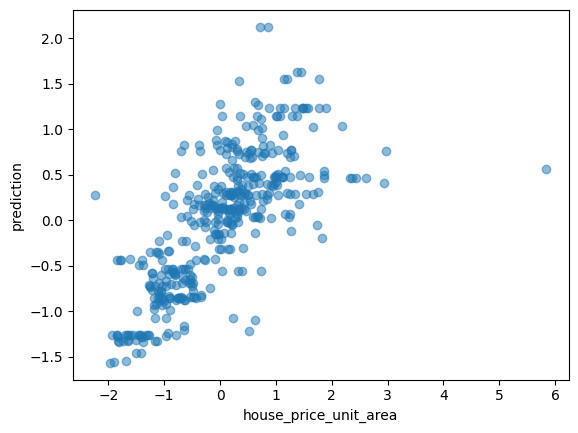

In [55]:
plt.scatter(realEst["house_price_unit_area_s"], realEst["prediction"], alpha=0.5)

plt.xlabel("house_price_unit_area")
plt.ylabel("prediction")

plt.show()

**Caption 1:** This is a plot of the house price per unit are against the predicted house price. From the upward movement, left to right we can tell that this graph has a positive slope.

## Task 2: multiple linear regression (all variables)

create a multiple regression model that utilizes all features to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

---

a univariate linear regression model looks like $y = a_0 + a_1 x$

a multivariate linear regression model with 3 exogenous variable looks like $y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3$

The easiest way to implement it is to use `statsmodels.formula.api` which allows to write out the formula you want to use for the regression in more or less plain English. We did it in the linear regression notebook https://github.com/fedhere/FDSFE_FBianco/blob/main/HW5/linear_regression_in_detail.ipynb

The univariate linear model we built in that notebook was

```
import statsmodels.formula.api as smf
     
mod = smf.ols(formula='wspeed ~ population', data=df)
res = mod.fit()
res.summary()
```

y = ax + b => `formula='wspeed ~ population'`

The intercept (b) is implied in the use of `~`
`x` in this case was population and `y` wspeed

Your formula will look like
`formula='y ~ x1 + x2 + x3 + x4'` with the approproate feature names

Make sure all your features and target columns are standardized, and that you are using all the features in the data frame (also make sure to use ```log10(distance_nearest_MRT_station)``` rather than ```distance_nearest_MRT_station``` as a feature)

In [56]:
feature2 = realEst[["log_distance_nearest_MRT_station", "convenience_stores", "transaction_date", "house_age"]]
target2 = realEst["house_price_unit_area"]

In [57]:
# -- your code here
feature2_s = (feature2-feature2.mean())/feature2.std()
target2_s = (target2-target2.mean())/target2.std()

Using the code library of your choice, fit a multiple linear regression model to the data

In [58]:
# -- your code here
x = sm.add_constant(feature2_s)
y = target2_s
simpleModel2 = sm.OLS(endog = y, exog = x).fit()
print(simpleModel2.summary())

                              OLS Regression Results                             
Dep. Variable:     house_price_unit_area   R-squared:                       0.601
Model:                               OLS   Adj. R-squared:                  0.597
Method:                    Least Squares   F-statistic:                     154.2
Date:                   Mon, 16 Oct 2023   Prob (F-statistic):           2.72e-80
Time:                           01:20:42   Log-Likelihood:                -396.62
No. Observations:                    414   AIC:                             803.2
Df Residuals:                        409   BIC:                             823.4
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Print the coefficients of each of the features

In [62]:
# -- your code here
print("coefficient for log_dist_MRT = %.3f" %simpleModel2.params['log_distance_nearest_MRT_station'])
print("coefficient for convenience_stores = %.3f" %simpleModel2.params['convenience_stores'])
print("coefficient for transaction_date = %.3f" %simpleModel2.params['transaction_date'])
print("coefficient for house_age = %.3f" %simpleModel2.params['house_age'])

coefficient for log_dist_MRT = -0.643
coefficient for convenience_stores = 0.137
coefficient for transaction_date = 0.152
coefficient for house_age = -0.177


What can you claim about the relative correlation and influence of each feature on the prediction of the target variable?

*your answer here*
The coefficients of each individual feature are not very large. The highest coefficient is 0.152. This means that each feature has a minimal influence on the target variable, and that there is also little to no correlation between the feature and the target.

Print the $R^2$ of this model

In [63]:
# -- your code here
print ("r2 = %.3f" %simpleModel2.rsquared)

r2 = 0.601


Looking only at the $R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

*your answer here*
Yes, the R-SQUARED for this model is better than that of the firstmodel, because it is higher. And the higher the R-SQUARED, the better the model fits your data.

Print the Adjusted-$R^2$ of this model

In [64]:
# -- your code here
print ("adjusted-r2 = %.3f" %simpleModel2.rsquared_adj)

adjusted-r2 = 0.597


Looking at both $R^2$ and Ajusted-$R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

*your answer here*
The adjusted Rsquared for this model is also higher than that of the first one. This is another indicaator that it is a better fit for our data. Because of this, I can say that the model has improved with the addition of the remaining features.

Plot the actual vs. model predicted values for the house price/unit area for all objects in the data. Is there any visible improvement in the quality of the prediction that you can claim from comparing this plot with the one from Task 2?

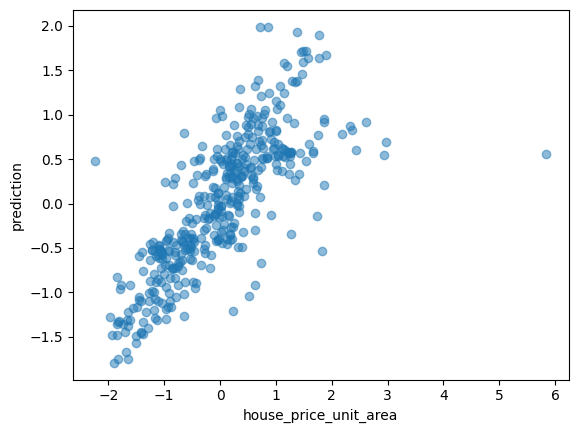

In [67]:
# -- your code here
realEst["prediction"] = simpleModel2.predict(x)
realEst["house_price_unit_area_s"]=target2_s
plt.scatter(realEst["house_price_unit_area_s"], realEst["prediction"], alpha=0.5)

plt.xlabel("house_price_unit_area")
plt.ylabel("prediction")

plt.show()

**Caption 2:** This is a plot of the house price per unit are against the predicted house price. From the upward movement, left to right we can tell that this graph has a positive slope.  

And Yes, there is an improvement. The points on this plot are less scattered and form a more linear shape than our first plot did. The points are visibly fitted better in this second plot.